# Business Understanding

The company is exploring the operation of airplanes for both commercial and private enterprises. This data analysis is designed to assist the company in identifying aircraft with the lowest risk profile, aiding in the informed decision-making process for the initiation of this new business endeavor.

# Data Understanding

For this analysis I will be using the [dataset](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses) from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.

Within this dataset, my research will be concentrated on identifying the safest airplanes for flight, with a specific emphasis on the latest generations of aircraft models known for their reliability, as opposed to older alternatives. Additionally, my analysis will prioritize assessing accident rates to pinpoint airplanes with a commendable track record of incident-free flights.

## Exploratory Data Analysis

In [1]:
#Start by importing the necessary libraries to analyze this data
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
#load the necessary csv dataframe
df = pd.read_csv('Aviation_Data.csv',low_memory=False)

In [3]:
#Exploring the columns, size and content of the dataframe
#90,348 rows x 31 columns
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

(90348, 31)

In [5]:
#getting a first look of how the dataframe looks on the first 10 rows
df.head(10)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,NaN,NaN,JAX,JACKSONVILLE INTL,...,Personal,NaN,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982


## Data Cleaning

In [6]:
#checking if there is any duplicates in the event id column and in accident number column
#we do not these duolicates of these values
df.duplicated(subset='Event.Id').value_counts()
df=df.drop_duplicates(subset='Event.Id')
df=df.drop_duplicates(subset='Accident.Number')

In [7]:
#the dataset now contains 87,952 rows
df.shape

(87952, 31)

In [8]:
#changing the date to date time, this will help to identify the 
#newer aircrafts
df['Event.Date']=pd.to_datetime(df['Event.Date'])
df['Event.Date']

0       1948-10-24
1       1962-07-19
2       1974-08-30
3       1977-06-19
4       1979-08-02
           ...    
90343   2022-12-26
90344   2022-12-26
90345   2022-12-26
90346   2022-12-26
90347   2022-12-29
Name: Event.Date, Length: 87952, dtype: datetime64[ns]

In [9]:
#creating a new column 'event month year' that contains only the month and year of event
df['Event.Month.Year']=df['Event.Date'].dt.strftime('%m-%Y')

In [10]:
#creating new columns for only month and year from the event date column
df['Event.Month']=df['Event.Date'].dt.month
df['Event.Year']=df['Event.Date'].dt.year

In [11]:
#exploring the quantity of na in the dataframe per column
df.isna().sum()

Event.Id                      1
Investigation.Type            0
Accident.Number               1
Event.Date                    1
Location                     53
Country                     223
Latitude                  53740
Longitude                 53749
Airport.Code              38351
Airport.Name              35835
Injury.Severity             991
Aircraft.damage            3104
Aircraft.Category         55771
Registration.Number        1286
Make                         64
Model                        93
Amateur.Built               101
Number.of.Engines          6028
Engine.Type                7025
FAR.Description           56037
Schedule                  75592
Purpose.of.flight          6123
Air.carrier               71419
Total.Fatal.Injuries      11268
Total.Serious.Injuries    12323
Total.Minor.Injuries      11761
Total.Uninjured            5864
Weather.Condition          4474
Broad.phase.of.flight     27115
Report.Status              6362
Publication.Date          15058
Event.Mo

Given that there are too many NaN values, I will create a subset with the necessary columns for my analysis.

In [12]:
#Creating a new data frame with only the columns needed to use and to be cleanes:Month and year of events, 
#Location, Country, Make, Model, Purpose of flight, Weather conditions
#Aircraft category, damage, injury severity, total fatal injuries, serious and minor injuries, total injured, 
#number of engines, engine type.

df_clean = df[['Event.Month', 'Event.Year','Location','Country','Make', 'Model', 'Purpose.of.flight', 'Weather.Condition','Aircraft.Category','Aircraft.damage','Injury.Severity' ,'Total.Fatal.Injuries', 'Total.Serious.Injuries','Total.Minor.Injuries', 'Total.Uninjured', 'Number.of.Engines', 'Engine.Type',  ]]

In [13]:
#Filtering events that happened between 1999 and 2022
df_clean=df_clean[(df_clean['Event.Year']>=1999)&(df_clean['Event.Year']<=2022)]

In [14]:
#after filtering most recent accidents, 43,146 rows are left
df_clean.shape

(43146, 17)

In [15]:
#Adding the title. format to these columns to match the same values and avoid repetition
df_clean['Make']=df_clean['Make'].str.title()
df_clean['Country']=df_clean['Country'].str.title()
df_clean['Location']=df_clean['Location'].str.title()

In [16]:
#checking for NaN values in the new subset df_clean 
df_clean.isna().sum()

Event.Month                   0
Event.Year                    0
Location                     19
Country                      26
Make                         55
Model                        69
Purpose.of.flight          6044
Weather.Condition          4458
Aircraft.Category         14732
Aircraft.damage            2084
Injury.Severity             990
Total.Fatal.Injuries      11000
Total.Serious.Injuries    11980
Total.Minor.Injuries      11412
Total.Uninjured            5631
Number.of.Engines          5066
Engine.Type                7011
dtype: int64

In [17]:
#out of the 100% of rows (43,423) only rows with less than 3% NaN values will be dropped
df_clean = df_clean.dropna(subset=['Location', 'Country', 'Make', 'Model', 'Injury.Severity'])

In [18]:
#checking again for clean data
df_clean.isna().sum()

Event.Month                   0
Event.Year                    0
Location                      0
Country                       0
Make                          0
Model                         0
Purpose.of.flight          5057
Weather.Condition          3510
Aircraft.Category         14538
Aircraft.damage            1566
Injury.Severity               0
Total.Fatal.Injuries      10969
Total.Serious.Injuries    11942
Total.Minor.Injuries      11374
Total.Uninjured            5603
Number.of.Engines          4298
Engine.Type                6154
dtype: int64

In [19]:
#after dropping the columns with 3% NaN, there are 42,052 rows left.
df_clean.shape

(42052, 17)

Starting Data cleaning per column:

In [20]:
#only keeping flights that are of 'personal and business purpose', they are the most populated values
df_clean['Purpose.of.flight'] = df_clean['Purpose.of.flight'].map(str)
df_clean['Purpose.of.flight'] = df_clean['Purpose.of.flight'].apply(lambda x: x if x in ['Personal', 'Business'] else None)

In [21]:
#replacing the NaN values of 'Purpose of flight' with the most common value 'Personal'
df_clean['Purpose.of.flight']=df_clean['Purpose.of.flight'].fillna('Personal')

In [22]:
#checking the values and the counts in the column 'Purpose of Flight'
df_clean['Purpose.of.flight'].value_counts()

Personal    40871
Business     1181
Name: Purpose.of.flight, dtype: int64

In [24]:
#Cleaning the 'weather condition' column
#I combined the value Unk and UNK to one value UNK
df_clean['Weather.Condition']=df_clean['Weather.Condition'].str.upper()

In [25]:
#checking the values and the counts in the column 'weather condition'
df_clean['Weather.Condition'].value_counts()

VMC    35914
IMC     2274
UNK      354
Name: Weather.Condition, dtype: int64

In [26]:
#replacing NaN with the most common value 'VMC' in the column 'weather condition'
df_clean['Weather.Condition']=df_clean['Weather.Condition'].fillna('VMC')

In [27]:
#In the 'aircraft category' column I filter to the only value what we need for this analysis which is 'airplanes'
df_clean['Aircraft.Category']=df_clean['Aircraft.Category'].map(str)
df_clean['Aircraft.Category']=df_clean['Aircraft.Category'].apply(lambda x: x if x in ['Airplane']else None)

In [28]:
#checking the values and the counts in the column 'Aircraft Category'
df_clean['Aircraft.Category'].value_counts()

Airplane    23336
Name: Aircraft.Category, dtype: int64

In [29]:
#replacing NaN with the most common value in the column 'Airplane Category'
df_clean['Aircraft.Category']=df_clean['Aircraft.Category'].fillna('Airplane')

In [30]:
#checking again the values and the counts in the column 'Aircraft Category'
df_clean['Aircraft.Category'].value_counts()

Airplane    42052
Name: Aircraft.Category, dtype: int64

In [31]:
#dropping the NaN values in the 'aircraft damage' column because of the low percentage of rows with NaN (3.6%)
df_clean = df_clean.dropna(subset=['Aircraft.damage'])

In [32]:
#checking the values and the counts in the column 'Aircraft damage'
df_clean['Aircraft.damage'].value_counts()

Substantial    33020
Destroyed       6227
Minor           1147
Unknown           92
Name: Aircraft.damage, dtype: int64

In [33]:
#Starting to analyze the 'Total Fatal Injuries' column
df_clean['Total.Fatal.Injuries'].value_counts()

0.0      21114
1.0       4405
2.0       2535
3.0        777
4.0        509
         ...  
58.0         1
239.0        1
33.0         1
265.0        1
162.0        1
Name: Total.Fatal.Injuries, Length: 94, dtype: int64

In [91]:
#cleaning the column 'Total.Fatal.Injuries' 
#checking the mean of the fatal injuries to fill the NaN values with that number
df_clean['Total.Fatal.Injuries'].mean()

0.6760186464088398

In [92]:
#using the mean of the 'fatal injuries column' to fill the NaN values, using 1 as the mean
df_clean['Total.Fatal.Injuries']=df_clean['Total.Fatal.Injuries'].fillna(1)

In [93]:
#cleaning the col 'Total.Serious.Injuries'
#checking the mean of the 'serious injuries' to fill the NaN values, using 0 as the mean
df_clean['Total.Serious.Injuries'].mean()

0.23512315837937384

In [37]:
#changing the mean of the 'total serious injuries' column to fill the NaN values, using 0 as the mean
df_clean['Total.Serious.Injuries']=df_clean['Total.Serious.Injuries'].fillna(0)

In [38]:
#cleaning the column 'Total.Minor.Injuries' 
#checking the mean to fill the NaN values
df_clean['Total.Minor.Injuries'].mean()

0.36914936914936913

In [39]:
#replacing NaN with mean 0 in the column 'Total.Minor.Injuries'
df_clean['Total.Minor.Injuries']=df_clean['Total.Minor.Injuries'].fillna(0)

In [40]:
#cleaning the column 'Total.Uninjured' 
#checking the mean to fill the NaN values
df_clean['Total.Uninjured'].mean()

3.9787185354691075

In [41]:
#replacing NaN with mean 4 in the column 'Total.Minor.Injuries'
df_clean['Total.Uninjured']=df_clean['Total.Uninjured'].fillna(4)

In [42]:
#cleaning the column 'Number of engines' 
#checking the mean to fill the NaN values
df_clean['Number.of.Engines'].mean()

1.1162013903975667

In [43]:
#replacing NaN with mean 1 in the column 'Number of engines' 
df_clean['Number.of.Engines']=df_clean['Number.of.Engines'].fillna(1)

In [44]:
#cleaning the 'engine.type' column
df_clean['Engine.Type'].value_counts()

Reciprocating      29926
Turbo Shaft         1868
Turbo Prop          1858
Turbo Fan            863
Unknown              334
Turbo Jet            237
None                  16
Electric               8
NONE                   2
LR                     1
UNK                    1
Hybrid Rocket          1
Geared Turbofan        1
Name: Engine.Type, dtype: int64

In [45]:
#Will only keep the most common and turbo engines in the 'engine.type' column
df_clean['Engine.Type']=df_clean['Engine.Type'].map(str)
df_clean['Engine.Type']=df_clean['Engine.Type'].apply(lambda x: x if x in ['Reciprocating', 'Turbo Shaft', 'Turbo Prop', 'Turbo Fan', 'Turbo Jet']else None)

In [46]:
#dropping the NaN values of the 'engine.type' column
df_clean=df_clean.dropna(subset=['Engine.Type'])

In [94]:
#checking the new size of the new subset
#34,752 rows and 17 columns
df_clean.shape

(34752, 18)

In [95]:
#creating a column with the total of all injuries: fatal, serious and minor
df_clean['Total.Injuries']=df_clean['Total.Fatal.Injuries']+df_clean['Total.Serious.Injuries']+df_clean['Total.Minor.Injuries']

In [96]:
#There are values: Fatal (10), Fatal (20), etc. 
#I will clean this column ' Injury severity' with only Fatal as the value, with no (#)
df_clean['Injury.Severity']=df_clean['Injury.Severity'].str.strip().replace(r'^fatal.*', 'Fatal', regex=True)

In [97]:
#checking the value counts in the column ' Injury severity'
df_clean['Injury.Severity'].value_counts()

Non-Fatal      27835
Fatal           6546
Incident         273
Minor             70
Serious           27
Unavailable        1
Name: Injury.Severity, dtype: int64

In [87]:
#checking the value count in the 'Number.of.Engines' column
df_clean['Number.of.Engines'].value_counts()

1.0    30686
2.0     3919
4.0       77
3.0       69
0.0        1
Name: Number.of.Engines, dtype: int64

In [98]:
#checking the clean data set
df_clean.isna().sum()

Event.Month               0
Event.Year                0
Location                  0
Country                   0
Make                      0
Model                     0
Purpose.of.flight         0
Weather.Condition         0
Aircraft.Category         0
Aircraft.damage           0
Injury.Severity           0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Number.of.Engines         0
Engine.Type               0
Total.Injuries            0
dtype: int64

Data set 'df_clean' is clean of NaN values.

# Data Analysis

The goal of this project is for the company to get the safest aircraft to start a new type of businness.
In order to get this list of the safest aircraft I would like to get a variable that will give me the output of that list of aircraft.

In [99]:
#starting the data analysis by checking the head of the data frame
df_clean.head()

,Event.Month,Event.Year,Location,Country,Make,Model,Purpose.of.flight,Weather.Condition,Aircraft.Category,Aircraft.damage,Injury.Severity,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Number.of.Engines,Engine.Type,Total.Injuries
45466,1.0,1999.0,"Minden, Nv",United States,Avions Max Holste,MH 1521 BROUSSARD,Personal,VMC,Airplane,Substantial,Non-Fatal,0.0,0.0,0.0,2.0,1.0,Reciprocating,0.0
45467,1.0,1999.0,"Shelbyville, Tx",United States,Cessna,421C,Personal,VMC,Airplane,Substantial,Non-Fatal,0.0,0.0,4.0,1.0,2.0,Reciprocating,4.0
45468,1.0,1999.0,"Hayward, Ca",United States,Piper,PA-22-108,Personal,VMC,Airplane,Destroyed,Non-Fatal,0.0,0.0,0.0,1.0,1.0,Reciprocating,0.0
45469,1.0,1999.0,"Smackover, Ar",United States,Piper,PA-32-300R,Personal,IMC,Airplane,Destroyed,Fatal,1.0,0.0,0.0,0.0,1.0,Reciprocating,1.0
45470,1.0,1999.0,"Farmingdale, Ny",United States,Beech,C-24R,Personal,VMC,Airplane,Substantial,Non-Fatal,0.0,0.0,2.0,0.0,1.0,Reciprocating,2.0


## Aircraft Damage by the Number of engines

First, I will analyze the aircraft damage based on how many engines the aircraft had.

In [100]:
#Analyzing the 'aircraft damage' given the 'number of engines'
df_clean[['Aircraft.damage','Number.of.Engines']].groupby(['Aircraft.damage']).agg(['count', 'median', 'mean'])

Number.of.Engines                 
                            count median      mean
Aircraft.damage                                   
Destroyed                    4638    1.0  1.196421
Minor                         719    2.0  1.744089
Substantial                 29389    1.0  1.096601
Unknown                         6    1.0  1.333333

Out of 4,638 Destroyed Aircraft, the median number of engines they had was 1 engine.
Out of 29,389 Substantial damaged Aircraft, the median number of engines they had was 1 engine.
Out of 719 Minor damaged Aircraft, the median number of engines they had were 2 engines.

The most damaged aircrafts are the ones that only have 1 engine

In [102]:
#creating the variable 'damage_by_numb_of_engines' that will show the number of aircrafts that were damaged
#based on the number of engines the aircraft had
damage_by_numb_of_engines=pd.crosstab(df_clean['Aircraft.damage'], df_clean['Number.of.Engines'])
damage_by_numb_of_engines

Number.of.Engines,0.0,1.0,2.0,3.0,4.0
Aircraft.damage,,,,,
Destroyed,0,3750,874,5,9
Minor,0,281,376,27,35
Substantial,1,26651,2667,37,33
Unknown,0,4,2,0,0


As seen below, when analyzing the variable 'damage_by_numb_of_engines' we can appreciate that there are less incidents when aircrafts posess more than 1 engine. 
The graph below can show the orange line which is 1 engine aircraft, having a peak of substantially damaged aircraft when in an accident.

<AxesSubplot:xlabel='Aircraft.damage'>

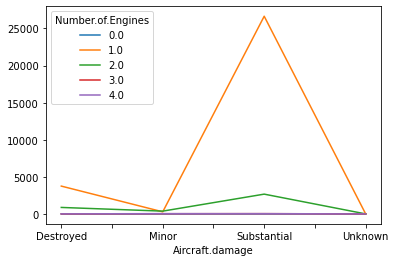

In [103]:
damage_by_numb_of_engines.plot()

## The amount of injuries based on the purpose of Flight

The total injuries column in the dataset contains a sum of all injuries: fatal, serious and minor.
I will analyze the amount of injuries that happened during accidents depending on the purpose of the flight.

In [57]:
#creating a data set to visualize statistical measures of the 'purpose of flight' by 'total injuries'
df_clean[['Purpose.of.flight','Total.Injuries']].groupby(['Purpose.of.flight']).agg(['count', 'median', 'mean'])

Total.Injuries                 
                           count median      mean
Purpose.of.flight                                
Business                     984    1.0  1.300813
Personal                   33768    1.0  1.142146

In [58]:
#creating a crosstab of the 'level of damage on aircrafts' based on the 'purpose of the flight'.
damage_by_purposeofflight=pd.crosstab(df_clean['Purpose.of.flight'], df_clean['Aircraft.damage'])
damage_by_purposeofflight

Aircraft.damage,Destroyed,Minor,Substantial,Unknown
Purpose.of.flight,,,,
Business,194,30,760,0
Personal,4444,689,28629,6


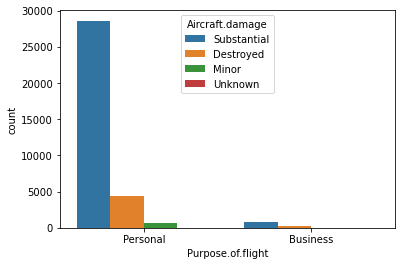

In [59]:
#graph of the count of aircrafts with their 'level of damage', based on the 'purpose of the flight'.
sns.countplot(x='Purpose.of.flight', hue= 'Aircraft.damage', data=df_clean)
plt.show()

In [60]:
#creating a data set to visualize statistical measures of the 'purpose of flight' by 'total injuries'
df_clean[['Purpose.of.flight','Total.Injuries']].groupby(['Purpose.of.flight']).agg(['count', 'median', 'mean'])

Total.Injuries                 
                           count median      mean
Purpose.of.flight                                
Business                     984    1.0  1.300813
Personal                   33768    1.0  1.142146

In [61]:
#crosstab of the 'number of total injuries' based on the 'purpose of flight'.
injuries_by_purposeofflight=pd.crosstab(df_clean['Purpose.of.flight'], df_clean['Total.Injuries'])
injuries_by_purposeofflight

Total.Injuries,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,96.0,104.0,110.0,113.0,121.0,134.0,157.0,190.0,217.0,265.0
Purpose.of.flight,,,,,,,,,,,,,,,,,,,,,
Business,314,360,158,70,48,20,8,2,1,1,...,0,0,0,0,0,0,0,0,0,0
Personal,12303,12858,5541,1787,731,242,102,55,25,24,...,1,1,1,2,1,1,1,1,1,1


I can conclude that there are less injuries in business flights than in personal flights.

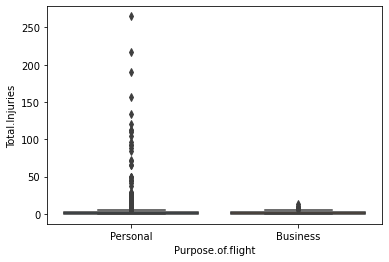

In [104]:
#boxplot will be used because one value is numerical and the other categorical.
sns.boxplot(x=df_clean['Purpose.of.flight'], y=df_clean['Total.Injuries'], data=df_clean)
plt.show()


To summarize there is more risk with Personal flights rather than flights for Bussiness such as commercial flights.

## Aircraft damage and Injuries based on the Month when accidents happened

Analyzing the most common month when accidents happen. To find the most hazardous month to flight, I will analyze the number of injuries and the damage on the aircraft.

In [63]:
#creating a data set to visualize statistical measures of the 'total injuries' by 'month of event'
df_clean[['Event.Month','Total.Injuries']].groupby(['Event.Month']).agg(['count', 'median', 'mean'])

Total.Injuries                 
                     count median      mean
Event.Month                                
1.0                   1925    1.0  1.200000
2.0                   1993    1.0  1.154039
3.0                   2593    1.0  1.033552
4.0                   2846    1.0  1.042164
5.0                   3427    1.0  1.164867
6.0                   3911    1.0  1.052928
7.0                   4314    1.0  1.177793
8.0                   3943    1.0  1.187421
9.0                   3277    1.0  1.092157
10.0                  2641    1.0  1.202953
11.0                  2025    1.0  1.296296
12.0                  1857    1.0  1.259020

July is the month with the highest amount of injuries with a number if 4,3314 injuries. Around the month of July (June/August) there is also a high chance of risk for an accident to happen.

Creating a data set to visualize statistical measures of the 'purpose of flight' by 'total injuries'

In [64]:
#creating a data set to visualize statistical measures of the 'aircraft damage' by 'month of event'
df_clean[['Aircraft.damage','Event.Month']].groupby(['Aircraft.damage']).agg(['count', 'median', 'mean'])

Event.Month                 
                      count median      mean
Aircraft.damage                             
Destroyed              4638    7.0  6.683053
Minor                   719    6.0  6.464534
Substantial           29389    7.0  6.539828
Unknown                   6    6.5  6.000000

Destroyed and Substantial damage on aircraft is on July and months around it (June/August).

In [65]:
#creating a dataset that will show the number of events and the damage the aircraft got per month
damage_by_month_of_the_year=pd.crosstab(df_clean['Aircraft.damage'], df_clean['Event.Month'])
damage_by_month_of_the_year

Event.Month,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
Aircraft.damage,,,,,,,,,,,,
Destroyed,318,274,302,366,418,461,539,512,428,374,309,337
Minor,47,64,67,55,66,64,67,70,49,59,54,57
Substantial,1560,1655,2223,2425,2942,3385,3706,3360,2800,2208,1662,1463
Unknown,0,0,1,0,1,1,2,1,0,0,0,0


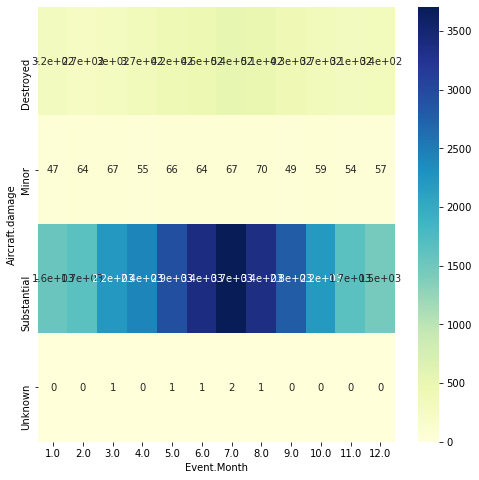

In [109]:
#creating a heatmap to show the most hazardous month to travel
plt.figure(figsize=(8, 8)) 
sns.heatmap(damage_by_month_of_the_year, annot=True, cmap='YlGnBu')
plt.show();

In [85]:
#creating a csv of the clean data set to use it in tableau
df_clean.to_csv('aircraft_data_clean.csv', index=False)

As shown in the graph there is substantial damage in the aircrafts when flying around and in the month of July.

## Final Analysis

Based on the comprehensive analysis conducted, it is in the company's best interest to embark on a new business endeavor focused on commercial flights. 
The recommended fleet configuration includes airplanes equipped with two or more engines to enhance safety and performance. Additionally, prudent planning should involve minimizing travel during the months of June through August, aligning with the identified higher risk periods.

In [68]:
#Based on the conditions found before, I will look for the final recommendation
#Using the conditions needed, the aircraft recommendation variable will return the result of the conditions
aircraft_recommendation=df_clean[(df_clean['Number.of.Engines']>1)&(df_clean['Aircraft.damage']=='Minor')&(df_clean['Injury.Severity']=='Non-Fatal')]
aircraft_recommendation['Make'].value_counts().head(3)

Boeing    63
Cessna    21
Airbus    17
Name: Make, dtype: int64

In [105]:
#Looking for the best type of engine to recommend
aircraft_recommendation['Engine.Type'].value_counts().head(3)

Turbo Fan        141
Turbo Prop        37
Reciprocating     21
Name: Engine.Type, dtype: int64

The top three recommended aircraft manufacturers for purchase are Boeing, Airbus, and Cessna, each producing airplanes equipped with two or more turbo engines.

# Conclusions

This analysis yields three key recommendations for the acquisition of airplanes in the context of the new business endeavor:

-**Airplanes with Multiple Turbo Engines:**
Opting for airplanes equipped with multiple turbo engines is advisable due to their ability to generate enhanced power, resulting in increased speed and safety. For business purposes, the advantage of multiple engines becomes evident during longer trips. Turbo engines not only contribute to improved performance, providing extra power, but also offer greater fuel efficiency.

-**Airplanes for Commercial Purposes:**
The data underscores the lower risks and accident rates associated with commercial airplanes. The affordability of commercial flights extends their reach to a broader audience, consequently enhancing profitability. Choosing airplanes designed for commercial use aligns with a prudent risk management strategy.

-**Optimal Months for Reduced Flights:**
The examined data reveals that the months of June, July, and August pose higher risks for flights, particularly in the Central areas of the US, such as the Midwest, Southwest, and West regions. Consideration of this information suggests that strategically reducing flights during these months can contribute to overall risk mitigation.